# Jia Zeng 8936740 - Lab 3
--- 

In [57]:
# load data
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# imports
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import datasets
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## Explore the data to gain insights

**Data Set Characteristics:**

  Number of Instances: 442 diabetes patients

  Number of Attributes: First 10 columns are numeric predictive values

  Target: Column 11 is a quantitative measure of disease progression one year after baseline
  
  Attribute Information:


| Syntax      | Description |
| ----------- | ----------- |
| age      | age in years       |
| sex      |        |
| bmi           | body mass index       |
| bp      | average blood pressure       |
| s1   | total serum cholesterol        |
| s2   | low-density lipoproteins        |
| s3   | high-density lipoproteins       |
| s4   | total cholesterol / HDL     |
| s5   | possibly log of serum triglycerides level        |
| s6   | blood sugar level        |

Text(0.5, 1.0, 'Feature importances via coefficients')

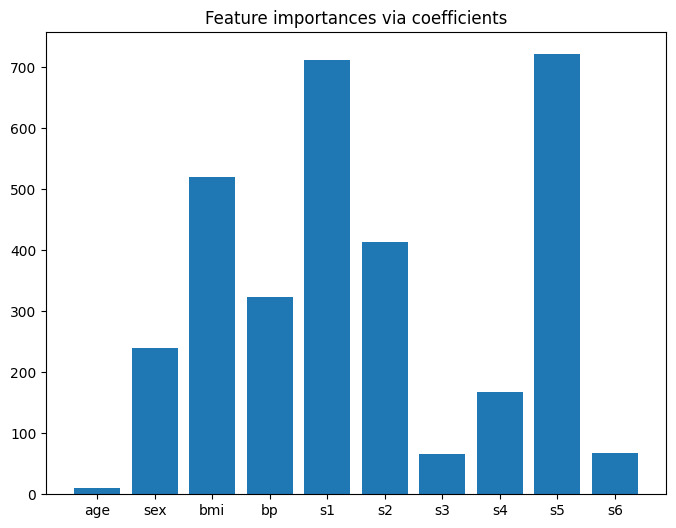

In [58]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(diabetes_X, diabetes_y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")

Showing how importance of the features effect the outcome.

---

## Fine-tune

In [59]:
# set to the third figure bmi
diabetes_X = diabetes_X[:, np.newaxis, 2]
# set to the target
diabetes_y = diabetes["target"]
# reshape
diabetes_X = diabetes_X.reshape((-1, 1))
diabetes_y = diabetes_y.reshape((-1, 1))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.6, random_state=0)

In [60]:
# Train the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
#print(y_pred)

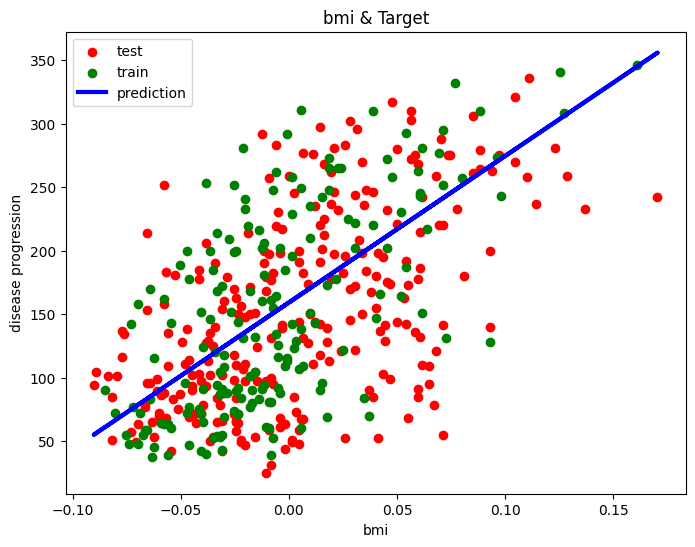

Coefficients: 1153.66
Intercept: 159.10
Mean squared error: 4210.38


In [64]:
# set graph size
plt.rcParams["figure.figsize"] = (8,6)
# Plot outputs
plt.scatter(X_test, y_test,  color='red', label = 'test')
plt.scatter(X_train, y_train, color='green', label = 'train')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label = 'prediction')
plt.legend()
plt.xlabel("bmi")
plt.ylabel("disease progression")
plt.title("bmi & Target")
plt.show()

# The coefficients
print('Coefficients: %.2f' % model.coef_[0])
# The intercept
print('Intercept: %.2f' % model.intercept_)
# The mean squared error
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

The coefficient shows a positive value, indicating that there is a positive relationship between the features. However, the graph reveals that the samples are not that accurate. Despite this, the graph still demonstrates the relationships between the features.

---
# Magic code for Convert to HTML

jupyter nbconvert --to html ./students_submissions/8936740/Lab3.ipynb --output-dir ./docs/8936740 --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags="['noshow']"